## Objetivo: Normalizar uma distribuição assimétrica

Utilizar métodos de normalização apresentados no livro Estatística Básica do Bussab&Morettin, e comparar qual foi o melhor resultado.

Além disso, tentar entender o que estamos perdendo de informação quando estamos realizando essa operação de normalização.

Por que normalizamos: Para diminuir o peso dos outliers existentes, e pois muitos métodos estatísticos tem como premissa de que a variável que está sendo estudada tem o comportamento de uma normal.

**Legenda** 

**[ ? ]** Dúvidas para sanar

In [5]:
import numpy as np
import pandas as pd
import matplotlib

%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format

### Estudando a distribuição

Escolhi a distribuição Beta para normalizar, pois ela é assimétrica à direita.

**[ ? ]** O que os parâmetros alpha e beta estão fazendo aqui nessa função?

In [2]:
s = pd.Series(np.random.beta(1, 10, size=10000))

O parâmetro `bins` se refere a quantidade de classes que serão criadas para plotar o histograma. Quanto maior o número, mais detalhado o histograma é, e menor o valor do eixo y, pois a frequência de cada classe irá diminuir. 

**[ ? ]** O parâmetro `normed` por sua vez causa dúvidas! Achava que significa deixar a média igual a 0... Mas vejo mudanças no eixo y quado coloco `normed=True` e não no eixo x...

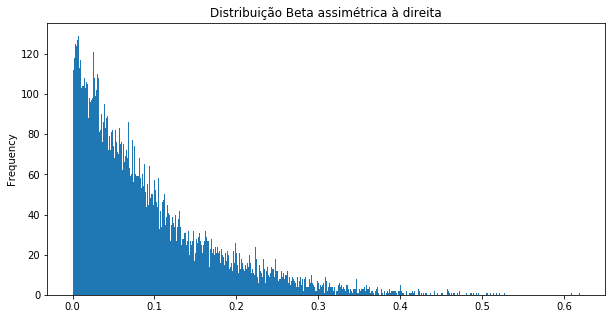

In [3]:
s.plot(bins=500, kind='hist', title='Distribuição Beta assimétrica à direita', figsize=(10,5))

In [6]:
s.describe()

count              10,000.00
mean                    0.09
std                     0.08
min                     0.00
25%                     0.03
50%                     0.07
75%                     0.13
max                     0.62
dtype: float64

Lembrando que o Limite Inferior (LI) do _box plot_ é definido por `(1o quartil) - (1.5 * (3o quartil - 1o quartil))` e o Limite Superior (LS) é definido por `(3o quartil) + (1.5 * (3o quartil - 1o quartil))`.

Nesse caso: LS: `0.13+(1.5*0.10) = 0.28` e LI: `0.03-(1.5*0.10) = -0.12`. No caso do LI, como o resultado é menor que o valor mínimo da variável, deixamos no _box plot_ o valor mínimo que é 0.

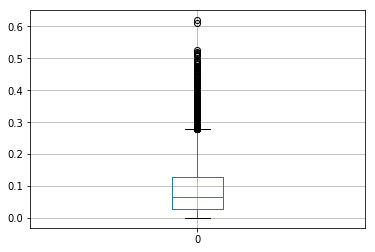

In [9]:
pd.DataFrame(s).boxplot()

### Transformação

Vamos escolher os seguintes valores para p: 

```
p=0, p=1/4, p=1/2 e p=1/3
```

**[ ? ]** O autor não deixa explícito no livro a razão da a escolha desses valores. Sabemos justificar? Além disso, por quê temos as seguintes regras de transformação:

```
Para p>0, x**p
Para p=0, ln(x)
Para p<0, -x**p
```

In [14]:
df = pd.DataFrame(s)
df.columns = ['beta_dist']

In [15]:
import math

In [16]:
df['p_0'] = df.beta_dist.map(lambda x: math.log(x))
df['p_1_4'] = df.beta_dist.map(lambda x: x**0.25)
df['p_1_2'] = df.beta_dist.map(lambda x: x**0.50)
df['p_1_3'] = df.beta_dist.map(lambda x: x**0.333)

### Análise dos resultados

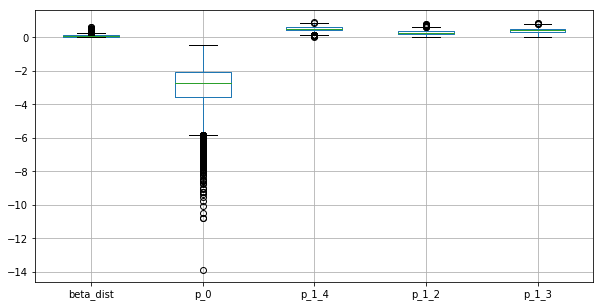

In [17]:
df.boxplot(figsize=(10,5))

In [18]:
df.describe()

,beta_dist,p_0,p_1_4,p_1_2,p_1_3
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.09,-2.93,0.50,0.27,0.41
std,0.08,1.24,0.13,0.13,0.14
min,0.00,-13.88,0.03,0.00,0.01
25%,0.03,-3.56,0.41,0.17,0.31
50%,0.07,-2.70,0.51,0.26,0.41
75%,0.13,-2.05,0.60,0.36,0.51
max,0.62,-0.48,0.89,0.79,0.85


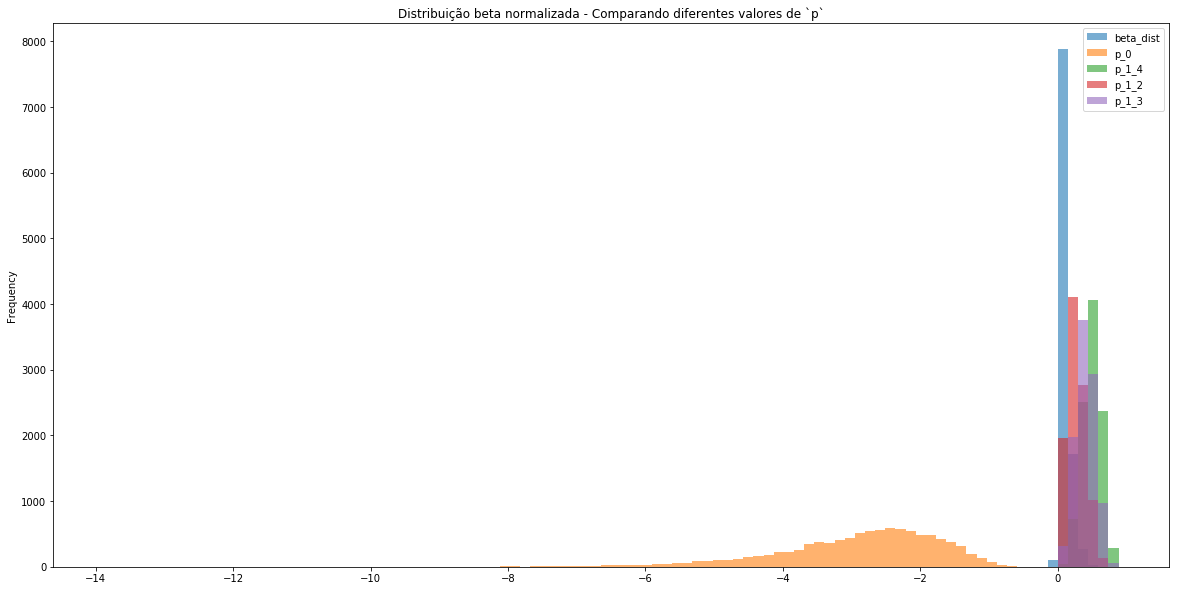

In [19]:
df.plot(kind='hist', alpha=0.6, bins=100, figsize=(20,10),
        title='Distribuição beta normalizada - Comparando diferentes valores de `p`')

In [20]:
# Tentativa da criação de um Gráfico de Simetria

# df_beta_dist_median = df.beta_dist.median()
# df_u = df[df.beta_dist < df_beta_dist_median][['beta_dist']].copy()
# df_v = df[df.beta_dist > df_beta_dist_median][['beta_dist']].copy()

# df_u['u_distance'] = df_u.beta_dist.map(lambda x: abs(x-df_beta_dist_median))
# df_v['v_distance'] = df_v.beta_dist.map(lambda x: abs(x-df_beta_dist_median))

# df_distance = pd.concat([df_u, df_v], axis=0)
# df_distance

## Conclusão

Olhando as médias obtidas e os gráficos, é possível ver que ainda temos outliers, mas aparentemente o valor de `p=0` traz uma distribuição mais simétrica e esparramada. **[ ? ]** De qualquer forma, ainda tenho dúvida se é possível concluir isso de fato.